
PIC 16A Homework 7

Author: Jiayu Li

UID: 605-348-766

Discussion Section: 3B

Date: 03/15/2023


In [67]:
import numpy as np
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
import matplotlib.pyplot as plt

## Problem 1: Support Vector Classifier

In [80]:
f = np.load('mnist.npz')
train_images = f['train_images']
train_labels = f['train_labels']
test_images = f['test_images']
test_labels = f['test_labels']
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(5000, 28, 28) (5000,) (1000, 28, 28) (1000,)


5


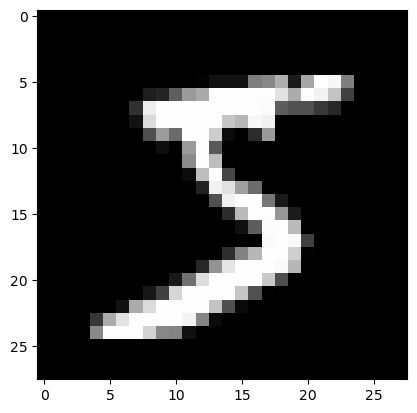

In [81]:
plt.imshow(train_images[0], cmap = "gray")
print(train_labels[0])

In [86]:
# implement your function here
def get_accuracy(n, select):
    if select == "firstn":
        X_train = train_images[:n].reshape(n, -1)
        y_train = train_labels[:n]
    elif select == "lastn":
        X_train = train_images[-n:].reshape(n, -1)
        y_train = train_labels[-n:]
    else:
        raise ValueError('Invalid value for select')

    clf = SVC()
    clf.fit(X_train, y_train)

    X_test = test_images.reshape(test_images.shape[0], -1)
    y_test = test_labels

    return clf.score(X_test, y_test)

In [87]:
# test code

for i in [100,1000,2000,3000]:
    print(get_accuracy(i, 'firstn'), end = ", ")
print('')
for i in [100,1000,2000,3000]:
    print(get_accuracy(i, 'lastn'), end = ", ")

# expected results
# 0.616, 0.875, 0.905, 0.922, 
# 0.596, 0.886, 0.911, 0.924, 

0.616, 0.875, 0.905, 0.922, 
0.596, 0.886, 0.911, 0.924, 

## Problem 2: Gaussian Process Regression

In [65]:
f = lambda x: np.sin(3 * np.pi * x)
X_train = np.linspace(0,5,41)[:,None]
y_train = np.array([ 0.04729858,  0.85573694,  0.73135073, -0.552757  , -0.92468572,
       -0.53615557,  0.70761949,  0.91185677, -0.08069819, -0.63669759,
       -0.76688907,  0.42992913,  1.10959561,  0.26116655, -0.57287114,
       -0.93609451,  0.10125155,  0.83249262,  0.60415376, -0.26170379,
       -0.94981277, -0.36879881,  0.77118289,  0.9766128 , -0.11543602,
       -1.14521288, -0.87528243,  0.20387401,  0.77814651,  0.31794035,
       -0.75994721, -0.92780045,  0.02149759,  0.88544365,  0.68171637,
       -0.37535822, -1.09972038, -0.45406906,  0.71064842,  0.856085  ,
       -0.05718811])
X_test = np.linspace(0,10,1001)[:,None]
kernel =   kernels.WhiteKernel(1.0, noise_level_bounds=[0.001,2]) \
        + kernels.ConstantKernel(1.0, constant_value_bounds=[0.1,2]) \
        * kernels.ExpSineSquared(length_scale=1.0, periodicity=2.0,length_scale_bounds=[0.2,4], periodicity_bounds=[0.1,5])

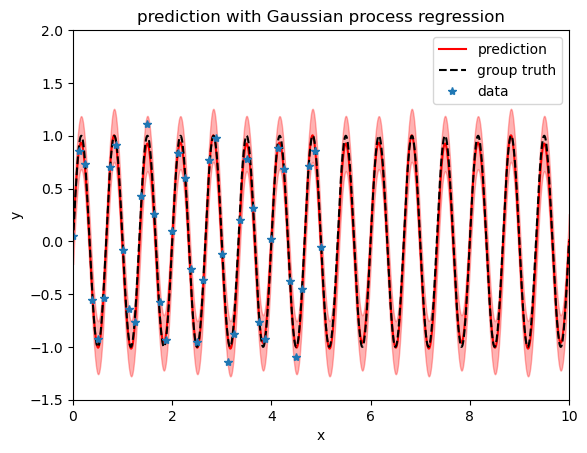

In [66]:
# write you code here. You need to show the plot

# Fit the Gaussian process regressor
gpr = GaussianProcessRegressor(kernel)
gpr.fit(X_train, y_train)

# # Predict the function values at the test points
mean, std = gpr.predict(X_test, return_std=True)

# Plot the results
plt.plot(X_test[:,0], mean, 'r-', label = 'prediction')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k--', label = 'ground truth')
plt.plot(X_train[:,0], y_train, '*', label = 'data')
plt.fill_between(X_test[:,0], mean+2*std, mean-2*std, color = 'red', alpha = 0.3)
plt.legend(loc='best')
plt.ylim(-1.5, 2.0)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('prediction with Gaussian process regression')
plt.show()